# First Kaggle challenge - Titanic

## Machine Learning from Disaster

- v1.6_032020
- author: marcusRB
- [Kaggle - Titanic challenge](https://www.kaggle.com/c/titanic/)

```
####
In this version I use only few feature, I try an another cleansing method.
I use same ML algorithms
####

```

This is the legendary Titanic ML competition – the best, first challenge for you to dive into ML competitions and familiarize yourself with how the Kaggle platform works.

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

### The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### What Data Will I Use in This Competition?
In this competition, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv` and the other is titled `test.csv`.

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

## Workflow stages
The competition solution workflow goes through seven stages described in the Data Science Solutions book.

1. Question or problem definition.
2. Acquire training and testing data.
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.

## Check the versions of libraries

In [1]:
# Check the versions of libraries MacOS

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.3 | packaged by conda-forge | (default, Jul  1 2019, 21:52:21) 
[GCC 7.3.0]
scipy: 1.4.1
numpy: 1.17.2
matplotlib: 3.1.1
pandas: 1.0.3
sklearn: 0.21.3


In [2]:
# Check the versions of libraries Win10 Docker
#!pip install --upgrade pandas
#!pip install --upgrade sklearn
#!pip install kaggle
#!pip install keras
#!pip install tensorflow

***

## Import Libraries

In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from scipy.stats import norm, skew
from scipy import stats
import xlrd, xdrlib

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# data mining
#from sklearn.impute import KNNImputer, MissingIndicator, SimpleImputer
from sklearn import impute
#from sklearn_pandas import categorical_imputer, CategoricalImputer
from sklearn.pipeline import make_pipeline, make_union, Pipeline
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# machine learning
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

## scikit modeling libraries
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

## Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils


## Load metrics for predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE, rfe
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Warnings and other tools
import itertools
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


***

## Load dataset

Kaggle we provide two datasets: train and test in csv extension. So, we check and analyze only train file.

In [4]:
# Load dataset train and test
test_titanic = pd.read_csv('test.csv')
ids = test_titanic['PassengerId']

# Create titanis list with both dataset to use same cleansing methods
titanic_list = pd.read_csv('titanic_list.csv')
titanic_list

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,FareGroup,InCabin,Deck,Room,AgeGroup,Title,Age*Class,Fare_Per_Person
0,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,2.110213,S,2,0,A,False,N,49.6159,Student,2,66.0,0.703404
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.280593,C,2,0,E,True,C,85.0000,Adult,1,38.0,1.426864
2,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.188856,S,1,1,B,False,N,49.6159,Young Adult,1,78.0,1.094428
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.990834,S,2,0,E,True,C,123.0000,Young Adult,1,35.0,1.330278
4,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.202765,S,1,1,B,False,N,49.6159,Young Adult,2,105.0,1.101382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",0,-0.5,0,0,2.202765,S,1,1,B,False,N,49.6159,Unknown,2,-1.5,1.101382
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,4.699571,C,1,1,E,True,C,105.0000,Adult,3,39.0,2.349785
1306,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,2.110213,S,1,1,A,False,N,49.6159,Adult,2,115.5,1.055107
1307,NaN,3,"Ware, Mr. Frederick",0,-0.5,0,0,2.202765,S,1,1,B,False,N,49.6159,Unknown,2,-1.5,1.101382


In [5]:
# Drop other features
col_drop = ['Parch', 'SibSp', 'Age', 'Name']
titanic_list.drop(col_drop, axis=1, inplace=True)

In [6]:
cat_feats = ['Pclass', 'FamilySize','Title']
for i in cat_feats:
    titanic_list[i] = titanic_list[i].astype('category')

In [7]:
titanic_list['Survived'] = titanic_list['Survived'][:891].astype(int)

* * *

## Scaling with StandardScaler

We made scaling by StandarScaler and evaluate results to first approach.

In [8]:
col_Z = ['Room', 'Age*Class','Fare_Per_Person', 'Pclass', 'FamilySize', 'Title']

In [9]:
features = titanic_list[col_Z]
scaler = StandardScaler().fit(features.values)
features = np.round(scaler.transform(features.values),4)

In [10]:
titanic_list[col_Z] = features
titanic_list.head(10)

,Survived,Pclass,Sex,Fare,Embarked,FamilySize,IsAlone,FareGroup,InCabin,Deck,Room,AgeGroup,Title,Age*Class,Fare_Per_Person
0,0.0,0.8419,0,2.110213,S,0.0734,0,A,False,N,-0.0000,Student,0.6862,0.4547,-1.0388
1,1.0,-1.5461,1,4.280593,C,0.0734,0,E,True,C,2.2175,Adult,-0.9323,-0.2725,0.6170
2,1.0,0.8419,1,2.188856,S,-0.5583,1,B,False,N,-0.0000,Young Adult,-0.9323,0.7664,-0.1439
3,1.0,-1.5461,1,3.990834,S,0.0734,0,E,True,C,4.5990,Young Adult,-0.9323,-0.3504,0.3959
4,0.0,0.8419,0,2.202765,S,-0.5583,1,B,False,N,-0.0000,Young Adult,0.6862,1.4676,-0.1279
5,0.0,0.8419,0,2.246893,Q,-0.5583,1,B,False,N,-0.0000,Unknown,0.6862,-1.2983,-0.0774
6,0.0,-1.5461,0,3.967694,S,-0.5583,1,E,True,E,-0.2266,Adult,0.6862,0.1431,1.8918
7,0.0,0.8419,0,3.094446,S,1.9684,0,C,False,N,-0.0000,Baby,-2.5508,-1.1036,-1.4683
8,1.0,0.8419,1,2.495954,S,0.7051,0,C,False,N,-0.0000,Young Adult,-0.9323,0.8443,-1.2206
9,1.0,-0.3521,1,3.436268,C,0.0734,0,D,False,N,-0.0000,Teenager,-0.9323,-0.5322,-0.0271


## Binarizing categorical variables

De cada variable categórica haremos `m` variables binarias, donde `m` es el numero de categorías de la variable.

In [11]:
titanic_list.head(10)

,Survived,Pclass,Sex,Fare,Embarked,FamilySize,IsAlone,FareGroup,InCabin,Deck,Room,AgeGroup,Title,Age*Class,Fare_Per_Person
0,0.0,0.8419,0,2.110213,S,0.0734,0,A,False,N,-0.0000,Student,0.6862,0.4547,-1.0388
1,1.0,-1.5461,1,4.280593,C,0.0734,0,E,True,C,2.2175,Adult,-0.9323,-0.2725,0.6170
2,1.0,0.8419,1,2.188856,S,-0.5583,1,B,False,N,-0.0000,Young Adult,-0.9323,0.7664,-0.1439
3,1.0,-1.5461,1,3.990834,S,0.0734,0,E,True,C,4.5990,Young Adult,-0.9323,-0.3504,0.3959
4,0.0,0.8419,0,2.202765,S,-0.5583,1,B,False,N,-0.0000,Young Adult,0.6862,1.4676,-0.1279
5,0.0,0.8419,0,2.246893,Q,-0.5583,1,B,False,N,-0.0000,Unknown,0.6862,-1.2983,-0.0774
6,0.0,-1.5461,0,3.967694,S,-0.5583,1,E,True,E,-0.2266,Adult,0.6862,0.1431,1.8918
7,0.0,0.8419,0,3.094446,S,1.9684,0,C,False,N,-0.0000,Baby,-2.5508,-1.1036,-1.4683
8,1.0,0.8419,1,2.495954,S,0.7051,0,C,False,N,-0.0000,Young Adult,-0.9323,0.8443,-1.2206
9,1.0,-0.3521,1,3.436268,C,0.0734,0,D,False,N,-0.0000,Teenager,-0.9323,-0.5322,-0.0271


In [12]:
titanic_list.dtypes

Survived           float64
Pclass             float64
Sex                  int64
Fare               float64
Embarked            object
FamilySize         float64
IsAlone              int64
FareGroup           object
InCabin               bool
Deck                object
Room               float64
AgeGroup            object
Title              float64
Age*Class          float64
Fare_Per_Person    float64
dtype: object

In [13]:
# We convert Categorical to boolean for first dataset
categorical_feature = titanic_list.dtypes == "object"
# filter categorical columns
categorical_cols = titanic_list.columns[categorical_feature].tolist()
categorical_cols

['Embarked', 'FareGroup', 'Deck', 'AgeGroup']

In [14]:
# Binarize categorical values
titanic_list = pd.get_dummies(titanic_list, columns=categorical_cols)
titanic_list.head(10)

,Survived,Pclass,Sex,Fare,FamilySize,IsAlone,InCabin,Room,Title,Age*Class,...,Deck_N,Deck_T,AgeGroup_Adult,AgeGroup_Baby,AgeGroup_Child,AgeGroup_Senior,AgeGroup_Student,AgeGroup_Teenager,AgeGroup_Unknown,AgeGroup_Young Adult
0,0.0,0.8419,0,2.110213,0.0734,0,False,-0.0000,0.6862,0.4547,...,1,0,0,0,0,0,1,0,0,0
1,1.0,-1.5461,1,4.280593,0.0734,0,True,2.2175,-0.9323,-0.2725,...,0,0,1,0,0,0,0,0,0,0
2,1.0,0.8419,1,2.188856,-0.5583,1,False,-0.0000,-0.9323,0.7664,...,1,0,0,0,0,0,0,0,0,1
3,1.0,-1.5461,1,3.990834,0.0734,0,True,4.5990,-0.9323,-0.3504,...,0,0,0,0,0,0,0,0,0,1
4,0.0,0.8419,0,2.202765,-0.5583,1,False,-0.0000,0.6862,1.4676,...,1,0,0,0,0,0,0,0,0,1
5,0.0,0.8419,0,2.246893,-0.5583,1,False,-0.0000,0.6862,-1.2983,...,1,0,0,0,0,0,0,0,1,0
6,0.0,-1.5461,0,3.967694,-0.5583,1,True,-0.2266,0.6862,0.1431,...,0,0,1,0,0,0,0,0,0,0
7,0.0,0.8419,0,3.094446,1.9684,0,False,-0.0000,-2.5508,-1.1036,...,1,0,0,1,0,0,0,0,0,0
8,1.0,0.8419,1,2.495954,0.7051,0,False,-0.0000,-0.9323,0.8443,...,1,0,0,0,0,0,0,0,0,1
9,1.0,-0.3521,1,3.436268,0.0734,0,False,-0.0000,-0.9323,-0.5322,...,1,0,0,0,0,0,0,1,0,0


In [15]:
train = titanic_list[:891]

In [16]:
testing = titanic_list[891:]

In [17]:
testing.head(10)

,Survived,Pclass,Sex,Fare,FamilySize,IsAlone,InCabin,Room,Title,Age*Class,...,Deck_N,Deck_T,AgeGroup_Adult,AgeGroup_Baby,AgeGroup_Child,AgeGroup_Senior,AgeGroup_Student,AgeGroup_Teenager,AgeGroup_Unknown,AgeGroup_Young Adult
891,NaN,0.8419,0,2.178064,-0.5583,1,False,-0.0,0.6862,1.4286,...,1,0,0,0,0,0,0,0,0,1
892,NaN,0.8419,1,2.079442,0.0734,0,False,-0.0,-0.9323,2.4026,...,1,0,1,0,0,0,0,0,0,0
893,NaN,-0.3521,0,2.369075,-0.5583,1,False,-0.0,0.6862,1.9611,...,1,0,0,0,0,1,0,0,0,0
894,NaN,0.8419,0,2.268252,-0.5583,1,False,-0.0,0.6862,0.8443,...,1,0,0,0,0,0,0,0,0,1
895,NaN,0.8419,1,2.586824,0.7051,0,False,-0.0,-0.9323,0.4547,...,1,0,0,0,0,0,1,0,0,0
896,NaN,0.8419,0,2.324836,-0.5583,1,False,-0.0,0.6862,-0.1686,...,1,0,0,0,0,0,0,1,0,0
897,NaN,0.8419,1,2.155152,-0.5583,1,False,-0.0,-0.9323,1.0780,...,1,0,0,0,0,0,0,0,0,1
898,NaN,-0.3521,0,3.401197,0.7051,0,False,-0.0,0.6862,0.0911,...,1,0,0,0,0,0,0,0,0,1
899,NaN,0.8419,1,2.107689,-0.5583,1,False,-0.0,-0.9323,0.1431,...,1,0,0,0,0,0,0,1,0,0
900,NaN,0.8419,0,3.224858,0.7051,0,False,-0.0,0.6862,0.3768,...,1,0,0,0,0,0,1,0,0,0


In [18]:
train['Survived'] = train['Survived'].astype(int)

In [19]:
testing.drop(['Survived'], axis=1, inplace=True)

In [20]:
train.head(10)

,Survived,Pclass,Sex,Fare,FamilySize,IsAlone,InCabin,Room,Title,Age*Class,...,Deck_N,Deck_T,AgeGroup_Adult,AgeGroup_Baby,AgeGroup_Child,AgeGroup_Senior,AgeGroup_Student,AgeGroup_Teenager,AgeGroup_Unknown,AgeGroup_Young Adult
0,0,0.8419,0,2.110213,0.0734,0,False,-0.0000,0.6862,0.4547,...,1,0,0,0,0,0,1,0,0,0
1,1,-1.5461,1,4.280593,0.0734,0,True,2.2175,-0.9323,-0.2725,...,0,0,1,0,0,0,0,0,0,0
2,1,0.8419,1,2.188856,-0.5583,1,False,-0.0000,-0.9323,0.7664,...,1,0,0,0,0,0,0,0,0,1
3,1,-1.5461,1,3.990834,0.0734,0,True,4.5990,-0.9323,-0.3504,...,0,0,0,0,0,0,0,0,0,1
4,0,0.8419,0,2.202765,-0.5583,1,False,-0.0000,0.6862,1.4676,...,1,0,0,0,0,0,0,0,0,1
5,0,0.8419,0,2.246893,-0.5583,1,False,-0.0000,0.6862,-1.2983,...,1,0,0,0,0,0,0,0,1,0
6,0,-1.5461,0,3.967694,-0.5583,1,True,-0.2266,0.6862,0.1431,...,0,0,1,0,0,0,0,0,0,0
7,0,0.8419,0,3.094446,1.9684,0,False,-0.0000,-2.5508,-1.1036,...,1,0,0,1,0,0,0,0,0,0
8,1,0.8419,1,2.495954,0.7051,0,False,-0.0000,-0.9323,0.8443,...,1,0,0,0,0,0,0,0,0,1
9,1,-0.3521,1,3.436268,0.0734,0,False,-0.0000,-0.9323,-0.5322,...,1,0,0,0,0,0,0,1,0,0


In [21]:
testing.head(10)

,Pclass,Sex,Fare,FamilySize,IsAlone,InCabin,Room,Title,Age*Class,Fare_Per_Person,...,Deck_N,Deck_T,AgeGroup_Adult,AgeGroup_Baby,AgeGroup_Child,AgeGroup_Senior,AgeGroup_Student,AgeGroup_Teenager,AgeGroup_Unknown,AgeGroup_Young Adult
891,0.8419,0,2.178064,-0.5583,1,False,-0.0,0.6862,1.4286,-0.1562,...,1,0,0,0,0,0,0,0,0,1
892,0.8419,1,2.079442,0.0734,0,False,-0.0,-0.9323,2.4026,-1.0623,...,1,0,1,0,0,0,0,0,0,0
893,-0.3521,0,2.369075,-0.5583,1,False,-0.0,0.6862,1.9611,0.0624,...,1,0,0,0,0,1,0,0,0,0
894,0.8419,0,2.268252,-0.5583,1,False,-0.0,0.6862,0.8443,-0.0530,...,1,0,0,0,0,0,0,0,0,1
895,0.8419,1,2.586824,0.7051,0,False,-0.0,-0.9323,0.4547,-1.1686,...,1,0,0,0,0,0,1,0,0,0
896,0.8419,0,2.324836,-0.5583,1,False,-0.0,0.6862,-0.1686,0.0118,...,1,0,0,0,0,0,0,1,0,0
897,0.8419,1,2.155152,-0.5583,1,False,-0.0,-0.9323,1.0780,-0.1824,...,1,0,0,0,0,0,0,0,0,1
898,-0.3521,0,3.401197,0.7051,0,False,-0.0,0.6862,0.0911,-0.7026,...,1,0,0,0,0,0,0,0,0,1
899,0.8419,1,2.107689,-0.5583,1,False,-0.0,-0.9323,0.1431,-0.2367,...,1,0,0,0,0,0,0,1,0,0
900,0.8419,0,3.224858,0.7051,0,False,-0.0,0.6862,0.3768,-0.8035,...,1,0,0,0,0,0,1,0,0,0


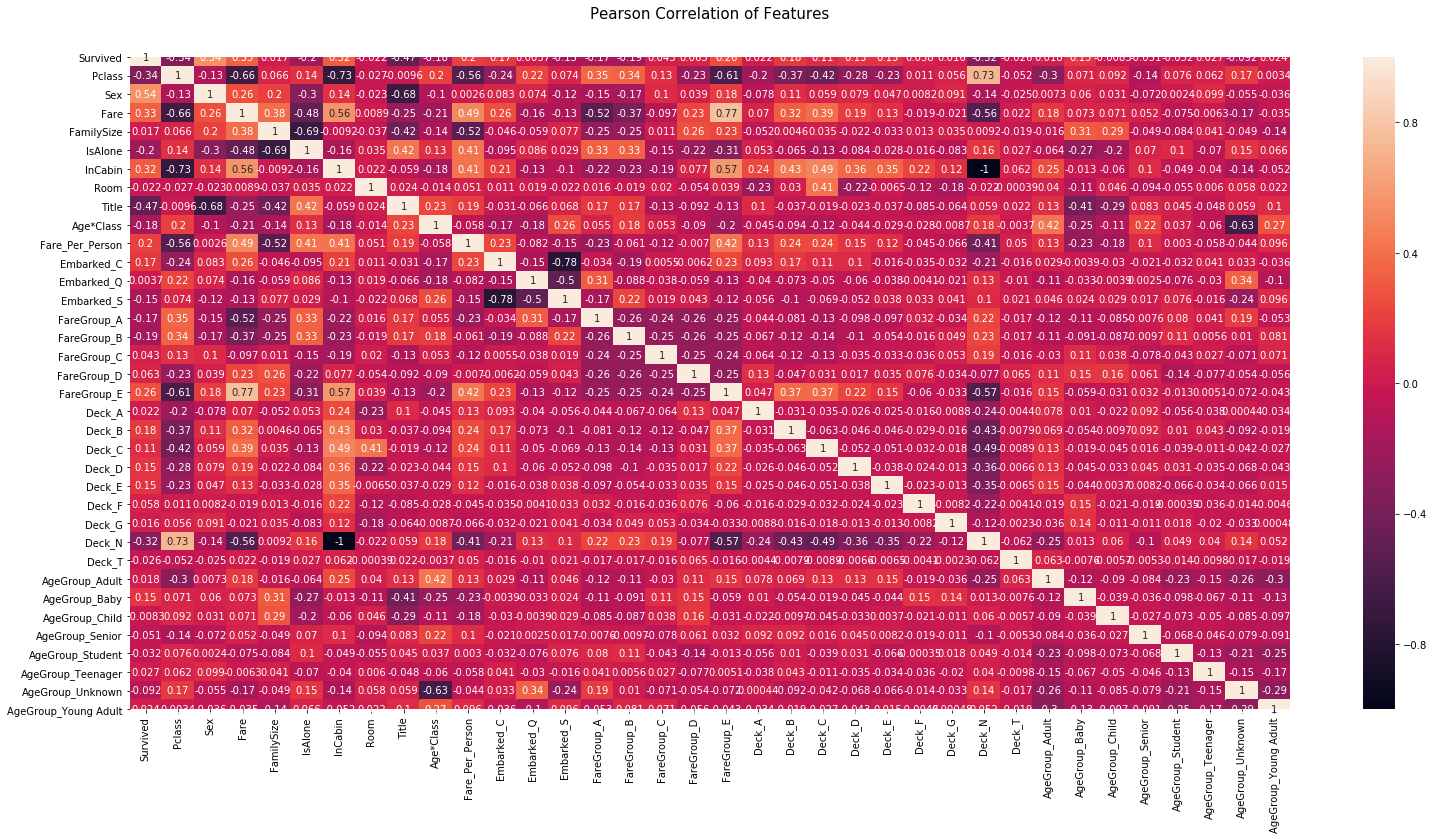

In [22]:
# Launch again new correlation matrix
correlation_matrix = train.corr()
correlation_matrix

plt.figure(figsize=(26,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(correlation_matrix, annot=True)

In [23]:
# Show 30 features with most correlation ratio - Spearman
corr = train.corr(method='spearman')
print (corr['Survived'].sort_values(ascending=False)[:30], '\n')
print (corr['Survived'].sort_values(ascending=False)[-5:])

Survived                1.000000
Sex                     0.543351
Fare                    0.323736
InCabin                 0.316912
FareGroup_E             0.263007
Deck_B                  0.175095
Embarked_C              0.168240
FamilySize              0.165463
Fare_Per_Person         0.151935
Deck_D                  0.150716
AgeGroup_Baby           0.150304
Deck_E                  0.145321
Deck_C                  0.114652
FareGroup_D             0.062529
Deck_F                  0.057935
FareGroup_C             0.043153
AgeGroup_Teenager       0.026859
AgeGroup_Young Adult    0.024381
Deck_A                  0.022287
AgeGroup_Adult          0.017590
Deck_G                  0.016040
Embarked_Q              0.003650
AgeGroup_Child         -0.008328
Deck_T                 -0.026456
AgeGroup_Student       -0.031701
AgeGroup_Senior        -0.051224
Room                   -0.076650
AgeGroup_Unknown       -0.092197
Embarked_S             -0.149683
Age*Class              -0.160719
Name: Surv

## Variable correlation

- What is Correlation?
- Test Dataset
- Covariance
- Pearson’s Correlation
- Spearman’s Correlation

Si visualizamos la matriz de correlación entre las variables, vemos que las mas correlacionadas con la que queremos predecir son `Sex`, `Pclass` i `isAlone`.

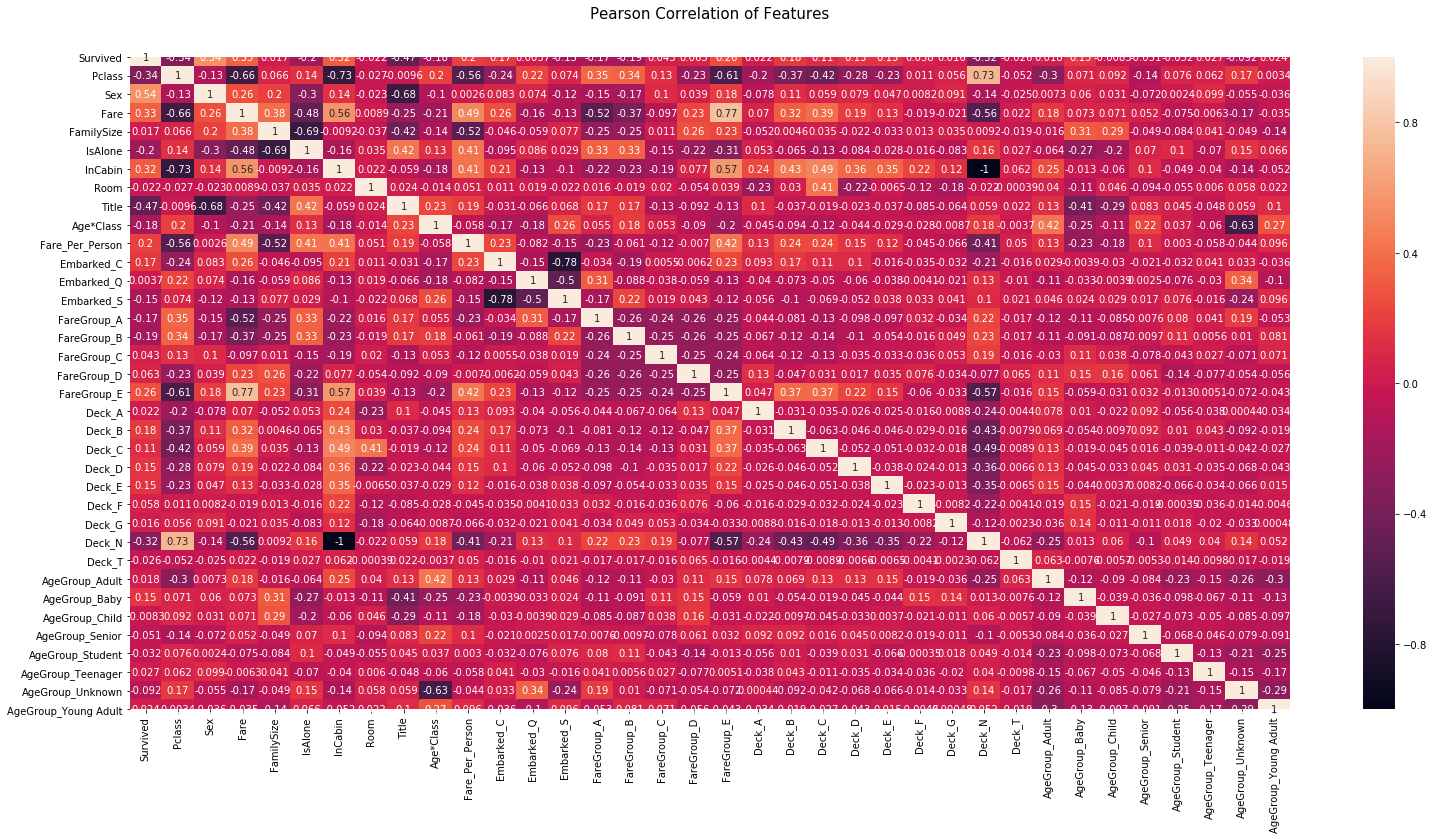

In [24]:
correlation_matrix = train.corr()
correlation_matrix

plt.figure(figsize=(26,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(correlation_matrix, annot=True)

In [25]:
train

,Survived,Pclass,Sex,Fare,FamilySize,IsAlone,InCabin,Room,Title,Age*Class,...,Deck_N,Deck_T,AgeGroup_Adult,AgeGroup_Baby,AgeGroup_Child,AgeGroup_Senior,AgeGroup_Student,AgeGroup_Teenager,AgeGroup_Unknown,AgeGroup_Young Adult
0,0,0.8419,0,2.110213,0.0734,0,False,-0.0000,0.6862,0.4547,...,1,0,0,0,0,0,1,0,0,0
1,1,-1.5461,1,4.280593,0.0734,0,True,2.2175,-0.9323,-0.2725,...,0,0,1,0,0,0,0,0,0,0
2,1,0.8419,1,2.188856,-0.5583,1,False,-0.0000,-0.9323,0.7664,...,1,0,0,0,0,0,0,0,0,1
3,1,-1.5461,1,3.990834,0.0734,0,True,4.5990,-0.9323,-0.3504,...,0,0,0,0,0,0,0,0,0,1
4,0,0.8419,0,2.202765,-0.5583,1,False,-0.0000,0.6862,1.4676,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,-0.3521,0,2.639057,-0.5583,1,False,-0.0000,2.3048,0.1431,...,1,0,0,0,0,0,0,0,0,1
887,1,-1.5461,1,3.433987,-0.5583,1,True,-0.4773,-0.9323,-0.7659,...,0,0,0,0,0,0,1,0,0,0
888,0,0.8419,1,3.196630,1.3367,0,False,-0.0000,-0.9323,-1.2983,...,1,0,0,0,0,0,0,0,1,0
889,1,-1.5461,0,3.433987,-0.5583,1,True,6.1657,0.6862,-0.5841,...,0,0,0,0,0,0,0,0,0,1


In [26]:
# Sales correlation matrix
k = 16 #number of variables for heatmap
plt.figure(figsize=(20,10))
corrmat = train.corr(method='spearman')
# picking the top 15 correlated features
cols15 = corrmat.nlargest(k, 'Survived')['Survived'].index
cm = np.corrcoef(train[cols15].values.T)
sns.set(font_scale=1.10)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, 
                 yticklabels=cols15.values, 
                 xticklabels=cols15.values, linewidths=.5).set_title("Spearman Correlation Matrix", y=1.05, size=15)
plt.show()

AttributeError: 'float' object has no attribute 'shape'

<Figure size 1440x720 with 0 Axes>

## Dimensionality Reduction by `PCA`

In Data Science projects, sometimes we encounter the "Curse of Dimensionality", in which we have too many features compared to the number of observations.  This can be problematic when fitting a model to the data.  A commonly used process is to apply dimensionality reduction techniques, such as Principal Component Analysis (a.k.a. PCA).  PCA transforms the data into a new dimensional space, where each dimension is orthogonal to each other.  The principal components are sorted from the ones that explain the highest to lowest variance.

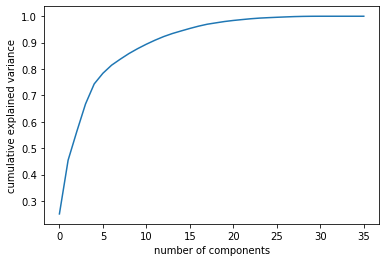

In [27]:
pca = PCA().fit(train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [28]:
# PCA training
Y = train['Survived']
train = train.drop(['Survived'], axis=1)
pcaT = PCA(n_components = 20)
X_pca = pcaT.fit_transform(train)
X_pca

array([[-1.73740387e+00,  1.96632124e-01, -1.42006604e-01, ...,
         3.30060641e-02,  3.73389956e-02,  5.74853630e-02],
       [ 2.89405433e+00,  1.61641337e-01,  1.12876609e+00, ...,
        -2.89916273e-01, -4.42353637e-01, -1.05285889e-01],
       [-1.22543575e+00, -3.47880197e-02, -2.03166190e-01, ...,
        -1.24897889e-01, -4.89321007e-03, -3.73770307e-02],
       ...,
       [-1.81591710e-01,  2.56913188e+00,  8.19183408e-01, ...,
         2.62477664e-01, -4.01673999e-03,  5.26738348e-03],
       [ 2.24842062e+00, -1.95984115e+00,  4.12269659e+00, ...,
        -1.56352785e-01, -2.67630802e-01, -1.02896699e-02],
       [-1.66089184e+00, -1.01262088e+00, -3.34245903e-01, ...,
        -2.06754337e-01,  6.22638839e-02,  3.84152548e-03]])

In [29]:
# PCA validation
pcaV = PCA(n_components = 20)
V_pca = pcaV.fit_transform(testing)
V_pca

array([[-1.51572493, -1.19162501,  1.04291359, ..., -0.04320282,
        -0.0943785 ,  0.04436608],
       [-1.72202338,  0.7797652 ,  1.96737149, ...,  0.05057346,
         0.16444663,  0.10426914],
       [-0.61912387, -1.31814182,  1.48776942, ...,  0.54998403,
         0.75754172, -0.31923021],
       ...,
       [-1.5228503 , -1.13526651,  1.59904893, ..., -0.0314764 ,
        -0.00929846, -0.04215088],
       [-1.29312572, -0.76809386, -1.24539973, ...,  0.06488901,
         0.06304409, -0.02822293],
       [-0.53799942,  2.52946453, -1.73843153, ...,  0.1878236 ,
         0.26234166,  0.11241174]])

In [30]:
# Create PCA dataframe
df_PCAx = pd.DataFrame(X_pca)
df_PCAx

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.737404,0.196632,-0.142007,0.174602,0.666234,0.286483,0.199548,-0.320233,-0.423342,0.068337,-0.508732,0.833704,0.019821,-0.361253,-0.374793,-0.209819,-0.251159,0.033006,0.037339,0.057485
1,2.894054,0.161641,1.128766,1.927957,-0.574473,0.659197,0.939778,-0.319831,-0.282244,0.184313,0.493384,-0.192473,-0.111848,-0.035134,-0.205011,-0.093913,-0.235202,-0.289916,-0.442354,-0.105286
2,-1.225436,-0.034788,-0.203166,0.176540,-1.580983,-0.124707,-0.592686,0.181942,-0.381833,-0.480955,0.487923,-0.321830,-0.314096,-0.000815,0.149186,0.045197,-0.124361,-0.124898,-0.004893,-0.037377
3,2.546986,0.093571,2.649153,3.736655,-0.578404,0.773702,-0.528336,0.390777,-0.872841,-0.435987,-0.147331,-0.135887,-0.192115,-0.325793,-0.126230,-0.150287,-0.086670,-0.062739,-0.352618,-0.048165
4,-1.696278,-1.101991,-0.748273,0.566901,-0.180578,-0.396091,-0.433594,0.262990,-0.426190,-0.423619,0.481135,-0.271322,-0.014245,0.079131,0.014525,-0.088073,0.048105,0.049620,-0.020904,-0.021454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.461061,-1.884429,-0.162217,-0.010670,1.337007,-0.198752,-0.344125,1.202412,-0.129604,0.462238,-0.417544,-0.052811,-0.161377,-0.022846,0.453696,0.136855,0.082364,-0.272554,0.036771,-0.121725
887,2.242489,-0.484751,0.037820,-0.903465,-0.998796,0.833782,-0.758058,-0.342991,0.316700,-0.335118,-0.055235,0.911656,0.198512,-0.348934,0.645491,0.149602,0.008447,0.225210,0.667166,-0.313883
888,-0.181592,2.569132,0.819183,-0.459123,0.294959,-0.206057,-0.380949,-0.061374,0.620538,-0.212388,0.038495,-0.165999,-0.285803,-0.598144,0.035440,0.083389,-0.502575,0.262478,-0.004017,0.005267
889,2.248421,-1.959841,4.122697,4.352773,0.379992,0.449384,0.277659,0.858359,0.262219,-0.931286,0.684393,0.505410,0.616249,-0.038111,0.437981,0.145282,0.001290,-0.156353,-0.267631,-0.010290


In [31]:
# Create PCA dataframe
df_PCAv = pd.DataFrame(V_pca)
df_PCAv

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.515725,-1.191625,1.042914,0.165791,-0.443994,0.834137,-0.610281,-0.135898,0.795491,-0.390271,-0.107545,-0.452757,-0.280791,0.278699,-0.387414,0.406812,-0.046401,-0.043203,-0.094379,0.044366
1,-1.722023,0.779765,1.967371,-0.093812,-1.645547,0.683871,0.181080,0.426975,-0.426843,-0.442118,-0.643738,-0.061878,0.072049,-0.273452,-0.141876,-0.559222,-0.155177,0.050573,0.164447,0.104269
2,-0.619124,-1.318142,1.487769,-0.051110,-0.530279,0.490300,0.046925,0.042615,0.105805,-0.170665,-0.017523,0.657305,-0.805579,0.872569,-0.521480,0.869540,0.032056,0.549984,0.757542,-0.319230
3,-1.334563,-1.107488,0.832607,0.043210,-0.124348,-0.550462,-0.228299,0.010338,0.731483,0.305628,-0.093393,0.605693,-0.040221,0.046520,-0.033610,-0.015937,-0.182223,-0.034425,-0.076237,0.004618
4,-1.348588,1.630326,0.530210,0.011314,-0.627643,-0.215901,0.255992,0.034458,-0.525085,0.658204,0.490862,-0.442713,-0.349838,-0.289028,0.249209,0.027821,-0.013500,0.033861,0.048362,0.104775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,-1.293126,-0.768094,-1.245400,0.121378,1.011424,-0.637899,-0.035516,0.265644,-0.059510,0.242683,-0.321424,0.696790,-0.081432,-0.124588,0.009362,-0.078741,-0.194799,0.064889,0.063044,-0.028223
414,3.730911,-2.491426,0.374880,3.469645,0.702456,0.332125,-0.419087,0.252732,-0.523372,0.018119,-0.262703,0.131262,-0.541266,-0.586799,0.824119,-0.074628,0.510027,-0.311014,-0.163528,-0.094178
415,-1.522850,-1.135267,1.599049,-0.054510,-0.429779,0.409619,-0.214184,0.306323,-0.473136,-0.446858,-0.597160,-0.118986,0.469173,-0.086683,0.002761,-0.194338,-0.104918,-0.031476,-0.009298,-0.042151
416,-1.293126,-0.768094,-1.245400,0.121378,1.011424,-0.637899,-0.035516,0.265644,-0.059510,0.242683,-0.321424,0.696790,-0.081432,-0.124588,0.009362,-0.078741,-0.194799,0.064889,0.063044,-0.028223


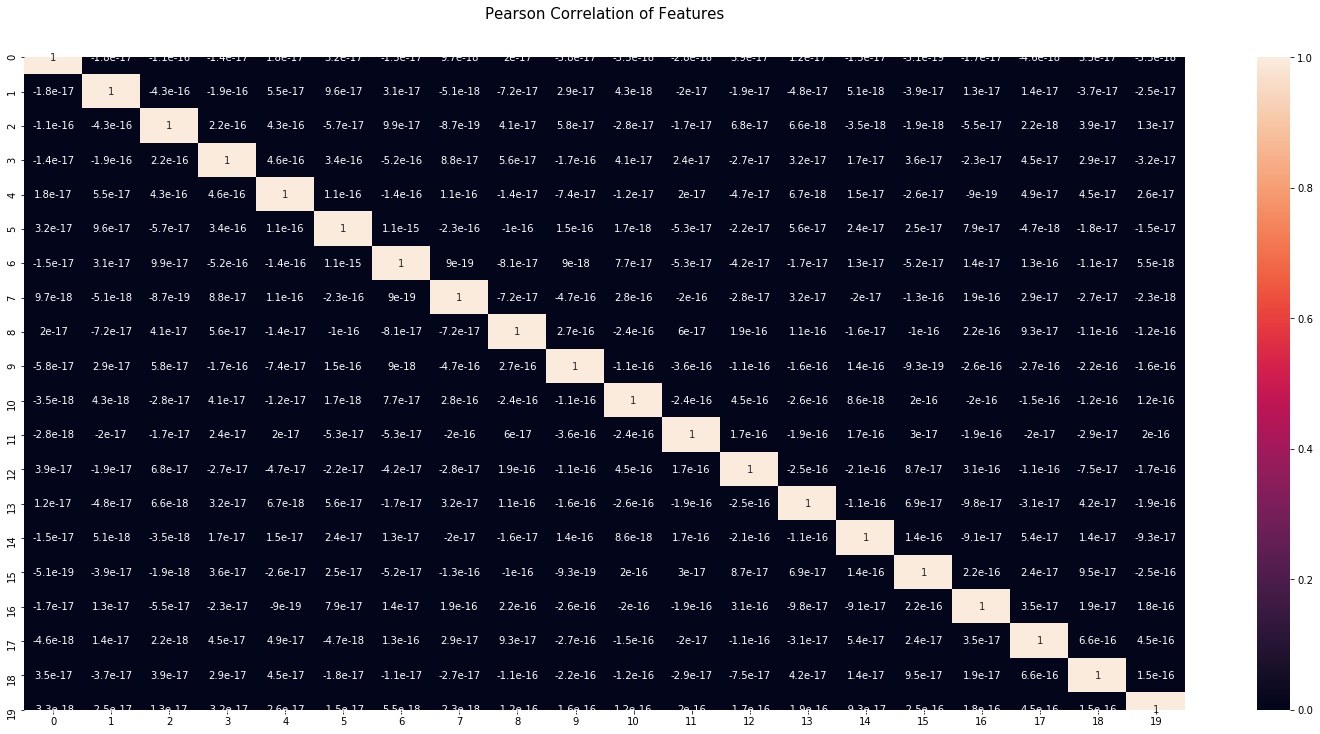

In [32]:
correlation_matrix = df_PCAx.corr()
correlation_matrix

plt.figure(figsize=(26,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(correlation_matrix, annot=True)

### Features selection

In [ ]:
train.columns.values

In [ ]:
train_titanic.info()

In [ ]:
train_titanic_vars = train.columns.values.tolist()
Y = ['Survived']
X = [v for v in train_titanic_vars if v not in Y]

In [ ]:
X

In [ ]:
train[X]

In [ ]:
train[Y]

In [ ]:
# Selection of 30 features
n = 30

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
lr = LogisticRegression()

In [ ]:
rfe = RFE(lr, n)
rfe = rfe.fit(train[X], train[Y].values.ravel())

In [ ]:
print(rfe.support_)

In [ ]:
print(rfe.ranking_)

In [ ]:
z=zip(train_titanic_vars, rfe.support_, rfe.ranking_)

In [ ]:
list(z)

Selection of features with RFE rank from 1 to 10

In [ ]:
colsSPT = []
for v, s, r in zip(features, rfe.support_, rfe.ranking_):
    if s == True:
        colsSPT.append(v)

In [ ]:
colsRNK = []
for v, s, r in zip(features, rfe.support_, rfe.ranking_):
    if r >=1 and r <=12:
        colsRNK.append(v)

In [ ]:
colsSPT

In [ ]:
colsRNK

In [ ]:
print(len(colsRNK)) # Are the features selected by Ranking
print(len(colsSPT)) # Are the features selected by Support

## Train and Test data

Dividimos los datos en dos conjuntos, de entrenamiento y de test. Con el conjunto de entrenamiento crearemos el modelo predictivo, y con el de test, lo evaluaremos para ver qué rendimiento tiene.

In [33]:
# Backup train and testing dataset
train_bak = train
testing_bak = testing

In [ ]:
#train_titanic = train_bak
#test_titanic = test_bak

In [34]:
train.head(10)

,Pclass,Sex,Fare,FamilySize,IsAlone,InCabin,Room,Title,Age*Class,Fare_Per_Person,...,Deck_N,Deck_T,AgeGroup_Adult,AgeGroup_Baby,AgeGroup_Child,AgeGroup_Senior,AgeGroup_Student,AgeGroup_Teenager,AgeGroup_Unknown,AgeGroup_Young Adult
0,0.8419,0,2.110213,0.0734,0,False,-0.0000,0.6862,0.4547,-1.0388,...,1,0,0,0,0,0,1,0,0,0
1,-1.5461,1,4.280593,0.0734,0,True,2.2175,-0.9323,-0.2725,0.6170,...,0,0,1,0,0,0,0,0,0,0
2,0.8419,1,2.188856,-0.5583,1,False,-0.0000,-0.9323,0.7664,-0.1439,...,1,0,0,0,0,0,0,0,0,1
3,-1.5461,1,3.990834,0.0734,0,True,4.5990,-0.9323,-0.3504,0.3959,...,0,0,0,0,0,0,0,0,0,1
4,0.8419,0,2.202765,-0.5583,1,False,-0.0000,0.6862,1.4676,-0.1279,...,1,0,0,0,0,0,0,0,0,1
5,0.8419,0,2.246893,-0.5583,1,False,-0.0000,0.6862,-1.2983,-0.0774,...,1,0,0,0,0,0,0,0,1,0
6,-1.5461,0,3.967694,-0.5583,1,True,-0.2266,0.6862,0.1431,1.8918,...,0,0,1,0,0,0,0,0,0,0
7,0.8419,0,3.094446,1.9684,0,False,-0.0000,-2.5508,-1.1036,-1.4683,...,1,0,0,1,0,0,0,0,0,0
8,0.8419,1,2.495954,0.7051,0,False,-0.0000,-0.9323,0.8443,-1.2206,...,1,0,0,0,0,0,0,0,0,1
9,-0.3521,1,3.436268,0.0734,0,False,-0.0000,-0.9323,-0.5322,-0.0271,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
# Select only 25 columns based con RFE scoring
X = df_PCA
Y = train['Survived']

In [ ]:
X.head(10)

In [ ]:
Y.head(10)

In [39]:
# Create train and test 80-20 with seed fixed to 42 for validation the model
X_train, X_test, y_train, y_test = train_test_split(df_PCAx, Y, test_size=0.20, random_state=42)

In [40]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
331,1.957169,-1.915534,2.637813,3.653293,0.432110,0.857563,-0.513082,-0.329033,0.884234,-0.210687,0.132738,0.066892,0.581611,-0.173854,0.199125,0.088757,0.031076,-0.266596,-0.264022,-0.103504
733,-0.182066,-1.017069,0.129039,-0.234500,0.195129,0.039205,-0.431436,0.261403,0.031457,0.916238,-0.373351,0.837635,0.094607,0.183746,0.371919,-0.205015,0.178997,-0.011825,-0.013836,0.031570
382,-1.653502,-1.048066,-0.594812,0.444249,-0.127769,-0.380017,-0.468830,0.276667,-0.432351,-0.409627,0.486060,-0.269749,-0.010749,0.077114,0.004225,-0.076460,0.036444,-0.009184,-0.001560,-0.017815
704,-1.752119,0.075776,-0.415516,0.429784,0.553990,0.166670,0.186774,0.507380,-0.505032,-0.520277,-0.539194,-0.065224,0.009283,-0.222564,-0.496617,-0.060385,-0.299422,-0.046486,0.048326,0.021845
813,-0.157206,3.886474,-0.092127,0.406624,0.940226,-0.461297,-0.350630,-0.123058,0.524304,-0.471256,0.007634,0.197398,-0.073060,-0.082173,0.535605,0.390879,-0.116126,-0.158314,0.141984,0.240585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-1.179734,0.118413,0.192265,-0.153533,-1.419754,0.196259,-0.023276,-0.637701,-0.171598,-0.160528,-0.638164,0.778743,-0.156460,-0.118937,0.105855,0.039519,-0.351760,-0.082528,-0.034080,-0.013115
270,1.666466,-1.228534,0.877717,-0.944974,0.703997,-0.019984,-0.787582,0.259660,1.153457,-0.133321,-0.188601,0.170560,-0.407904,0.250209,-0.048565,-0.106775,0.009970,0.367053,-0.082565,0.020017
860,-1.586657,0.408410,-1.522199,1.378035,0.621445,-0.040346,0.380684,0.062573,0.223637,0.979269,-0.173237,-0.383158,0.237592,-0.138718,-0.032286,-0.142169,-0.068793,0.113467,0.022769,-0.024006
435,2.834948,1.650649,1.619903,2.411318,0.346375,0.617271,-0.348050,-0.278244,-0.817062,0.015809,-0.172717,0.040356,-0.355875,-0.153811,-0.209216,0.832884,0.509784,0.349537,0.746416,-0.165250


* * *
## Neural Network with Keras 1st part

In [48]:
# Carga de las variables
inputDim = len(df_PCAx.columns.tolist()) # el total de las variables predictoras
layers = 60 # neuronas capas internas
epoch = 100 # ciclos del dataset
batchSize = 2 # trozos a separar el dataset
nSplits = 10 # cross-validation - combinación n train-test
verbose = 2# nos muestra el modo debugging 0 none #1 progress bar #2 por linea
output = 1 # las clases de salida a predecir

In [49]:
# baseline model
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(layers, input_dim=inputDim, activation='relu'))
    model.add(Dense(output, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [50]:
# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline, epochs=epoch, 
                            batch_size=batchSize, verbose=verbose)
kfold = StratifiedKFold(n_splits=nSplits, 
                        shuffle=True)

In [51]:
results = cross_val_score(estimator, X_train, y_train, cv=kfold)

Epoch 1/100
 - 0s - loss: 0.5371 - accuracy: 0.7484
Epoch 2/100
 - 0s - loss: 0.4340 - accuracy: 0.8188
Epoch 3/100
 - 0s - loss: 0.4088 - accuracy: 0.8328
Epoch 4/100
 - 0s - loss: 0.3969 - accuracy: 0.8219
Epoch 5/100
 - 0s - loss: 0.3866 - accuracy: 0.8438
Epoch 6/100
 - 0s - loss: 0.3788 - accuracy: 0.8516
Epoch 7/100
 - 0s - loss: 0.3736 - accuracy: 0.8469
Epoch 8/100
 - 0s - loss: 0.3677 - accuracy: 0.8531
Epoch 9/100
 - 0s - loss: 0.3615 - accuracy: 0.8562
Epoch 10/100
 - 0s - loss: 0.3582 - accuracy: 0.8641
Epoch 11/100
 - 0s - loss: 0.3522 - accuracy: 0.8547
Epoch 12/100
 - 0s - loss: 0.3487 - accuracy: 0.8641
Epoch 13/100
 - 0s - loss: 0.3434 - accuracy: 0.8641
Epoch 14/100
 - 0s - loss: 0.3397 - accuracy: 0.8687
Epoch 15/100
 - 0s - loss: 0.3354 - accuracy: 0.8687
Epoch 16/100
 - 0s - loss: 0.3304 - accuracy: 0.8672
Epoch 17/100
 - 0s - loss: 0.3261 - accuracy: 0.8734
Epoch 18/100
 - 0s - loss: 0.3236 - accuracy: 0.8750
Epoch 19/100
 - 0s - loss: 0.3189 - accuracy: 0.8766
Ep

In [52]:
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 79.73% (4.57%)


In [53]:
testing = cross_val_predict(estimator, X_test, y_test, cv=kfold)

Epoch 1/100
 - 0s - loss: 0.5800 - accuracy: 0.7688
Epoch 2/100
 - 0s - loss: 0.4829 - accuracy: 0.7937
Epoch 3/100
 - 0s - loss: 0.4328 - accuracy: 0.8062
Epoch 4/100
 - 0s - loss: 0.4002 - accuracy: 0.8250
Epoch 5/100
 - 0s - loss: 0.3758 - accuracy: 0.8313
Epoch 6/100
 - 0s - loss: 0.3611 - accuracy: 0.8438
Epoch 7/100
 - 0s - loss: 0.3466 - accuracy: 0.8687
Epoch 8/100
 - 0s - loss: 0.3346 - accuracy: 0.8687
Epoch 9/100
 - 0s - loss: 0.3218 - accuracy: 0.8687
Epoch 10/100
 - 0s - loss: 0.3120 - accuracy: 0.8750
Epoch 11/100
 - 0s - loss: 0.2987 - accuracy: 0.8875
Epoch 12/100
 - 0s - loss: 0.2925 - accuracy: 0.8813
Epoch 13/100
 - 0s - loss: 0.2843 - accuracy: 0.8875
Epoch 14/100
 - 0s - loss: 0.2778 - accuracy: 0.9000
Epoch 15/100
 - 0s - loss: 0.2707 - accuracy: 0.9000
Epoch 16/100
 - 0s - loss: 0.2656 - accuracy: 0.8938
Epoch 17/100
 - 0s - loss: 0.2590 - accuracy: 0.9000
Epoch 18/100
 - 0s - loss: 0.2529 - accuracy: 0.9062
Epoch 19/100
 - 0s - loss: 0.2475 - accuracy: 0.9062
Ep

In [54]:
print("Baseline: %.2f%% (%.2f%%)" % (testing.mean()*100, testing.std()*100))

Baseline: 44.69% (49.72%)


# Validation


In [59]:
df_PCAv

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.515725,-1.191625,1.042914,0.165791,-0.443994,0.834137,-0.610281,-0.135898,0.795491,-0.390271,-0.107545,-0.452757,-0.280791,0.278699,-0.387414,0.406812,-0.046401,-0.043203,-0.094379,0.044366
1,-1.722023,0.779765,1.967371,-0.093812,-1.645547,0.683871,0.181080,0.426975,-0.426843,-0.442118,-0.643738,-0.061878,0.072049,-0.273452,-0.141876,-0.559222,-0.155177,0.050573,0.164447,0.104269
2,-0.619124,-1.318142,1.487769,-0.051110,-0.530279,0.490300,0.046925,0.042615,0.105805,-0.170665,-0.017523,0.657305,-0.805579,0.872569,-0.521480,0.869540,0.032056,0.549984,0.757542,-0.319230
3,-1.334563,-1.107488,0.832607,0.043210,-0.124348,-0.550462,-0.228299,0.010338,0.731483,0.305628,-0.093393,0.605693,-0.040221,0.046520,-0.033610,-0.015937,-0.182223,-0.034425,-0.076237,0.004618
4,-1.348588,1.630326,0.530210,0.011314,-0.627643,-0.215901,0.255992,0.034458,-0.525085,0.658204,0.490862,-0.442713,-0.349838,-0.289028,0.249209,0.027821,-0.013500,0.033861,0.048362,0.104775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,-1.293126,-0.768094,-1.245400,0.121378,1.011424,-0.637899,-0.035516,0.265644,-0.059510,0.242683,-0.321424,0.696790,-0.081432,-0.124588,0.009362,-0.078741,-0.194799,0.064889,0.063044,-0.028223
414,3.730911,-2.491426,0.374880,3.469645,0.702456,0.332125,-0.419087,0.252732,-0.523372,0.018119,-0.262703,0.131262,-0.541266,-0.586799,0.824119,-0.074628,0.510027,-0.311014,-0.163528,-0.094178
415,-1.522850,-1.135267,1.599049,-0.054510,-0.429779,0.409619,-0.214184,0.306323,-0.473136,-0.446858,-0.597160,-0.118986,0.469173,-0.086683,0.002761,-0.194338,-0.104918,-0.031476,-0.009298,-0.042151
416,-1.293126,-0.768094,-1.245400,0.121378,1.011424,-0.637899,-0.035516,0.265644,-0.059510,0.242683,-0.321424,0.696790,-0.081432,-0.124588,0.009362,-0.078741,-0.194799,0.064889,0.063044,-0.028223


In [ ]:
predictions = np.array(model.predict(test_data)).argmax(axis=1)
print (predictions)

In [60]:
validation = cross_val_predict(estimator, X=df_PCAv, y=None, cv=kfold)

TypeError: Singleton array array(None, dtype=object) cannot be considered a valid collection.

In [55]:
# Build Validation Model on dataset 2
data_val = cross_val_predict(df_PCAv)
Predictive_Model = pd.DataFrame({
        "PassengerId": ids,
        "Survived": data_val
        })

Predictive_Model.to_csv('submission_predictor_2x.csv', index=False)

TypeError: cross_val_predict() missing 1 required positional argument: 'X'

In [ ]:
# Split and drop Survived variable
X_train = X.drop('Survived', axis=1)
Y_train = X['Survived']

In [ ]:
validation_cols = X_train.columns.values.tolist()

In [ ]:
validation_cols

In [ ]:
validation = testing[validation_cols]

In [ ]:
validation.head(5)

In [ ]:
# Check null and NA values for both dataset
validation.isna().sum()

In [ ]:
# GBC Classifier
GBC_Model = GradientBoostingClassifier()

scores = cross_val_score(GBC_Model, X_train, Y_train, cv = K_fold,
                       n_jobs = 4, scoring = 'accuracy')

print(scores)
round(np.mean(scores)*100, 2)

In [ ]:
# Gradient boosting tunning
GBC = GradientBoostingClassifier()
gb_param_grid = {
              'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01, 0.001],
              'max_depth': [4, 8,16],
              'min_samples_leaf': [100,150,250],
              'max_features': [0.3, 0.1]
              }

gsGBC = GridSearchCV(GBC, param_grid = gb_param_grid, cv=K_fold, 
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,Y_train)
GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

In [ ]:
# Linear Discriminant Analysis 
LDA_Model= LinearDiscriminantAnalysis()

scores = cross_val_score(LDA_Model, X_train, Y_train, cv = K_fold,
                       n_jobs = 4, scoring = 'accuracy')

print(scores)
round(np.mean(scores)*100, 2)

In [ ]:
# Linear Discriminant Analysis - Parameter Tuning
LDA = LinearDiscriminantAnalysis()

## Search grid for optimal parameters
lda_param_grid = {"solver" : ["svd"],
              "tol" : [0.0001,0.0002,0.0003]}


gsLDA = GridSearchCV(LDA, param_grid = lda_param_grid, cv=K_fold,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsLDA.fit(X_train,Y_train)
LDA_best = gsLDA.best_estimator_

# Best score
gsLDA.best_score_

In [ ]:
# Logistic Regression
#
Log_Model = LogisticRegression(C=1)
scores = cross_val_score(Log_Model, X_train, Y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

In [ ]:
# LogisticRegression Parameters tunning 
LRM = LogisticRegression()

## Search grid for optimal parameters
lr_param_grid = {"penalty" : ["l2"],
              "tol" : [0.0001,0.0002,0.0003],
              "max_iter": [100,200,300],
              "C" :[0.01, 0.1, 1, 10, 100],
              "intercept_scaling": [1, 2, 3, 4],
              "solver":['liblinear'],
              "verbose":[1]}


gsLRM = GridSearchCV(LRM, param_grid = lr_param_grid, cv=K_fold,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsLRM.fit(X_train,Y_train)
LRM_best = gsLRM.best_estimator_

# Best score
gsLRM.best_score_

In [ ]:
# Random Forest Classifier Model
#
RFC_model = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(RFC_model, X_train, Y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

In [ ]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()

## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "min_samples_split": [2, 6, 20],
              "min_samples_leaf": [1, 4, 16],
              "n_estimators" :[100,200,300,400],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC, param_grid = rf_param_grid, cv=K_fold,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,Y_train)
RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

In [ ]:
# Gaussian Naive Bayes
GNB_Model = GaussianNB()

scores = cross_val_score(GNB_Model, X_train, Y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

In [ ]:
# Support Vector Machine
SVM_Model = SVC()

scores = cross_val_score(SVM_Model, X_train, Y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

In [ ]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100, 200, 300]}

gsSVMC = GridSearchCV(SVMC, param_grid = svc_param_grid, cv = K_fold,
                      scoring="accuracy", n_jobs= -1, verbose = 1)

gsSVMC.fit(X_train,Y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

In [ ]:
#1st -- 82.38%
#2nd -- 81.48%
#3rd -- 82.16%
#4th -- 82.37%
VotingPredictor = VotingClassifier(estimators =
                           [('rfc', RFC_best), 
                            ('gbc', GBC_best),
                           ('svc', SVMC_best)],
                           voting='hard', n_jobs = 4)


VotingPredictor = VotingPredictor.fit(X_train, Y_train)

scores = cross_val_score(VotingPredictor, X_train, Y_train, cv = K_fold,
                       n_jobs = 4, scoring = 'accuracy')

print(scores)
print(round(np.mean(scores)*100, 2))

In [ ]:
# 1st -- 82.04%
# 2nd -- 81.93%
# 3rd -- 81.71%
# 4th -- 82.6%
VotingPredictor = VotingClassifier(estimators =
                            [('rfc', RFC_best), 
                             ('svc', SVMC_best),
                             ('gbc', GBC_best),
                             ('lda', LDA_best),
                             ('lrm', LRM_best)],
                            voting='soft', n_jobs = 4)

VotingPredictor = VotingPredictor.fit(X_train, Y_train)

scores = cross_val_score(VotingPredictor, X_train, Y_train, cv = K_fold,
                       n_jobs = 4, scoring = 'accuracy')

print(scores)
print(round(np.mean(scores)*100, 2))

In [ ]:
# 81,71%
VotingPredictor = VotingClassifier(estimators =
                            [ ('rfc', RFC_best), 
                             ('svc', SVMC_best),
                             ('gbc', GBC_best),
                             ('lda', LDA_best),
                             ('lrm', LRM_best)],
                            voting='hard', n_jobs = 8)

VotingPredictor = VotingPredictor.fit(X_train, Y_train)

scores = cross_val_score(VotingPredictor, X_train, Y_train, cv = K_fold,
                       n_jobs = 4, scoring = 'accuracy')

print(scores)
print(round(np.mean(scores)*100, 2))

In [ ]:
validation.head(10)

In [ ]:
# Drop PassengerId variable on test dataset
#ids = test_titanic['PassengerId'] # create a sub-dataset for submission file and saving it 
#test_titanic = test_titanic.drop('PassengerId', axis=1)

In [ ]:
test_titanic.head(10)

In [ ]:
test_titanic.shape

In [ ]:
validation.shape

In [ ]:
ids.shape

In [ ]:
data_val = VotingPredictor.predict(validation)

In [ ]:
# Submit results on Kaggle 
submission = pd.DataFrame({
    'PassengerId' : ids,
    'Survived': data_val
})

In [ ]:
# Kaggle SCORING 77.511 

In [ ]:
submission.to_csv('titanic_model_15.csv', index=False)

In [ ]:
# Let's look inside
submission = pd.read_csv('titanic_model_15.csv')
submission.head()